# Task 1

## Objectives to complete

Main objective: **Identify the usage profile of different wagon types within the long-term dataset. Apply explorative
data analysis and statistics. Get started with the following questions**:  
- How often are the wagons moved? Which differences can be identified between the wagon types?
- Are there seasonal dependencies?
- How much distance do the wagons travel loaded, how much empty? How far do they travel in different countries?
- Does the battery capacity of the telematic device change during the year, what might be the reasons?
- Use your understanding of the data to derive at least one further insight and explain its significance for DB Cargo.

### Import statements

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

import data_loader

### Data loading

In [53]:
data = data_loader.load_pre_processed_csv(5, columns=['longitude', 'latitude', 'GNSS_velocity', 'movement_state', 'loading_state', 'altitude', 'wagon_ID', 'timestamp_measure_position'])
# data = data[data['movement_state']==0]

### Plotting of the data

['naturalearth_lowres', 'naturalearth_cities', 'nybb']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
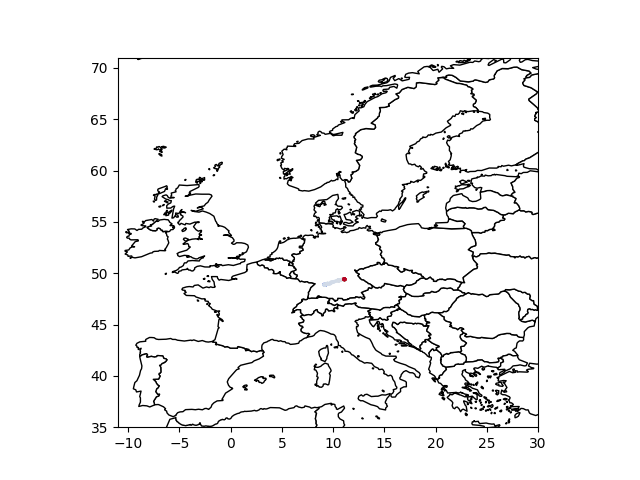

In [58]:
test = data.sample(n=1)
single_wagon_data = data[data['wagon_ID']==test.wagon_ID.values[0]].sort_values('timestamp_measure_position')
print(geopandas.datasets.available)
# world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = geopandas.read_file('CNTR_RG_20M_2020_4326.shp.zip')
ax = world.plot(
    color='white', edgecolor='black')
#ax.scatter(single_wagon_data.longitude, single_wagon_data.latitude, c=single_wagon_data.timestamp_measure_position, s=3, alpha=1, cmap='coolwarm')
ax.plot(single_wagon_data.longitude,single_wagon_data.latitude)
ax.set_xlim(-11,30)
ax.set_ylim(35, 71)
# ax.set_xlim(6,10)
# ax.set_ylim(46, 47.8)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
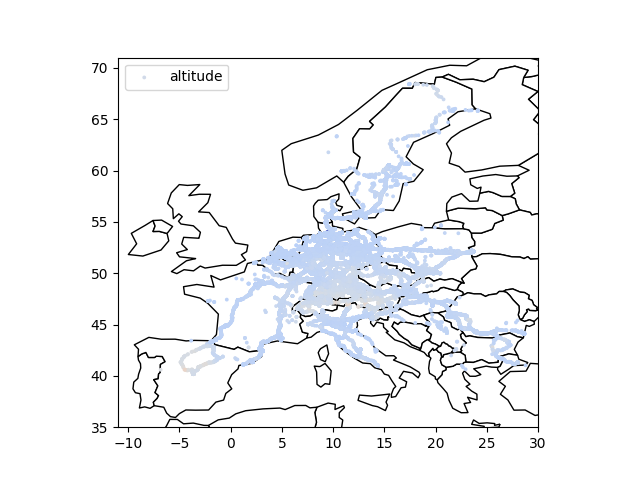

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(
    color='white', edgecolor='black')
# gdf.plot(ax=ax, color='red', markersize=2)
ax.scatter(data.longitude[::50],data.latitude[::50], c=data.altitude[::50], s=3, alpha=1, cmap='coolwarm', label='altitude')
ax.set_xlim(-11,30)
ax.set_ylim(35, 71)
ax.legend()

plt.show()

## Reading whole dataset and filtering using chunk to fit RAM size

In [3]:
iter_csv = pd.read_csv('./data/preprocessed/longtermdata.csv', iterator=True, chunksize=10000000, dtype=data_loader.dtype_pre)
print(len(iter_csv)
df = pd.concat([chunk[chunk['wagon_ID'] == 903003551764367] for chunk in iter_csv])

#### Sort rows by **timestamp_measure_position**
Blue == empty  
Red == full

In [5]:
df = df.sort_values('timestamp_measure_position')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
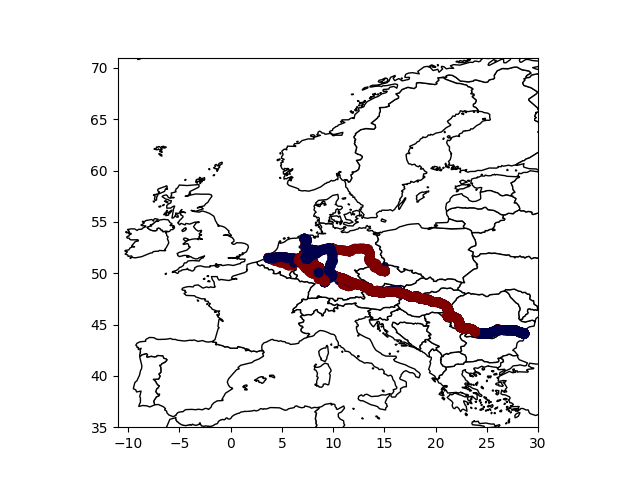

In [10]:
world = geopandas.read_file('CNTR_RG_20M_2020_4326.shp.zip')
ax = world.plot(
    color='white', edgecolor='black')
ax.scatter(df.longitude,df.latitude, c=df.loading_state, cmap='seismic')
ax.set_xlim(-11,30)
ax.set_ylim(35, 71)
plt.show()

(array([0.04667628, 0.04491015, 0.04062098, 0.03431337, 0.02800577,
        0.02851038, 0.03153803, 0.03507029, 0.03986407, 0.04112559,
        0.04642398, 0.04491015, 0.0476855 , 0.04591937, 0.03507029,
        0.03961176, 0.05046084, 0.04743319, 0.05197467, 0.05348849]),
 array([3.05555556e-03, 1.20265278e+00, 2.40225000e+00, 3.60184722e+00,
        4.80144444e+00, 6.00104167e+00, 7.20063889e+00, 8.40023611e+00,
        9.59983333e+00, 1.07994306e+01, 1.19990278e+01, 1.31986250e+01,
        1.43982222e+01, 1.55978194e+01, 1.67974167e+01, 1.79970139e+01,
        1.91966111e+01, 2.03962083e+01, 2.15958056e+01, 2.27954028e+01,
        2.39950000e+01]),
 <BarContainer object of 20 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
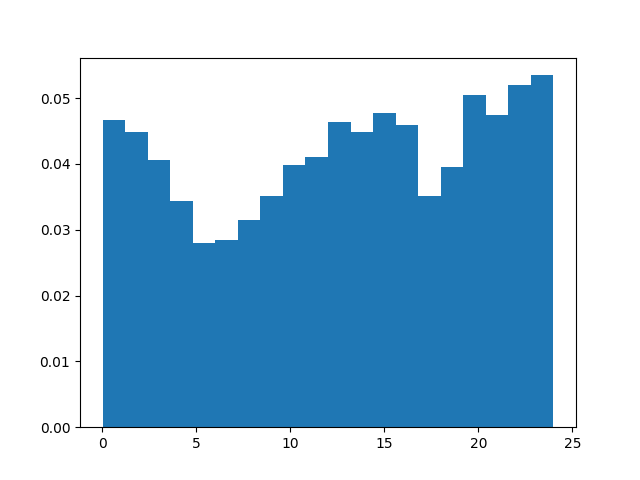

In [33]:
hour = df[df['movement_state']==2]['timestamp_measure_position'].mod(86400).div(3600)
fig, axs = plt.subplots(1, 1, squeeze=False)
axs[0][0].hist(hour, bins=20, density=True)
#fig.show()

## Battery state

In [2]:
data = pd.read_csv('./data/preprocessed/data_battery_state')
sorted_data = data.sort_values(by='timestamp_measure_battery')
# sorted_data = sorted_data.where(sorted_data['provider']==37)
def group_by_weeks(index):
    return np.floor(sorted_data['timestamp_measure_battery'].iloc[index]/(604800*6))

In [3]:
battery_state_group = sorted_data['battery_state'].groupby(by=group_by_weeks)

In [43]:
battery_state_group

3.0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
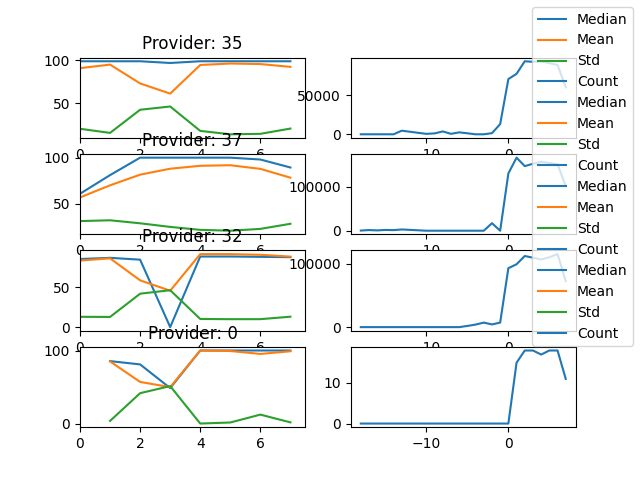

In [5]:
provider = pd.unique(sorted_data.provider)

fig, axs = plt.subplots(len(provider), 2, squeeze=False)
for i, p in enumerate(provider):
    battery_state_group = sorted_data['battery_state'].where(sorted_data['provider']==p).groupby(by=group_by_weeks)

    battery_state_median = battery_state_group.median()
    battery_state_mean = battery_state_group.mean()
    battery_state_std = battery_state_group.std()
    battery_state_count = battery_state_group.count()

#fig, axs = plt.subplots(1, 1, squeeze=False)
    axs[i][0].plot(battery_state_median, label='Median')
    axs[i][0].plot(battery_state_mean, label='Mean')
    axs[i][0].plot(battery_state_std, label='Std')
    #axs[i][0].set_xlim(0, battery_state_group.idxmax().index[-1])
    axs[i][0].set_title('Provider: {}'.format(p))
    axs[i][1].plot(battery_state_count, label='Count')
    axs[i][0].set_xlim([0, 7.5])
fig.legend()